## DSSD上的事件的筛选和分类-根据相邻条和正背面关联关系
### 数据文件：data/RIBLL2018_16C/normParas/data_16C_afterNorm.root
Branch：d1xne,d1yne,d2xne,d2yne,d3xne,d3yne: hit 结构中归一化之后的能量，能量已排序。
             其他Branch与data_16C.root文件相同

In [1]:
TFile *ipf=new TFile("data_16C_afterNorm.root");
TTree *ipt=(TTree*) ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");

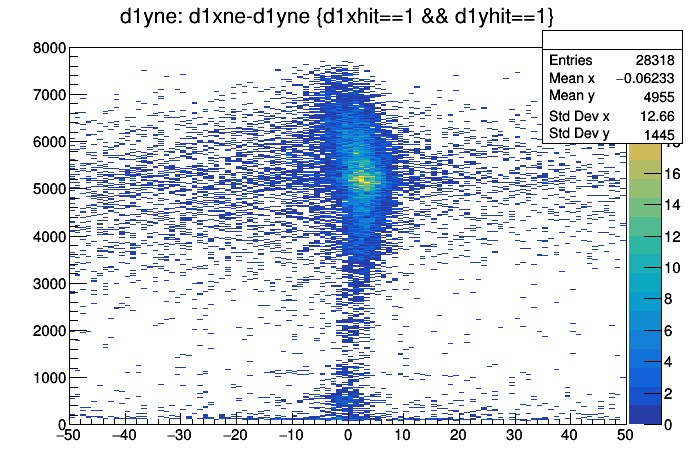

In [2]:
tree->Draw("d1yne: d1xne-d1yne>>(100,-50,50,1000,0,8000)","d1xhit==1 && d1yhit==1","colz");
c1->Draw();//目测，d1xne-d1yne的能量差在(-15,15)范围内时，可认为有front-back correlation。一般取上图向x方向投影后在峰位的(-3sigma, +3sigma) 范围
//对于大能量沉积事件，条件应适当放宽，见Scan部分说明。

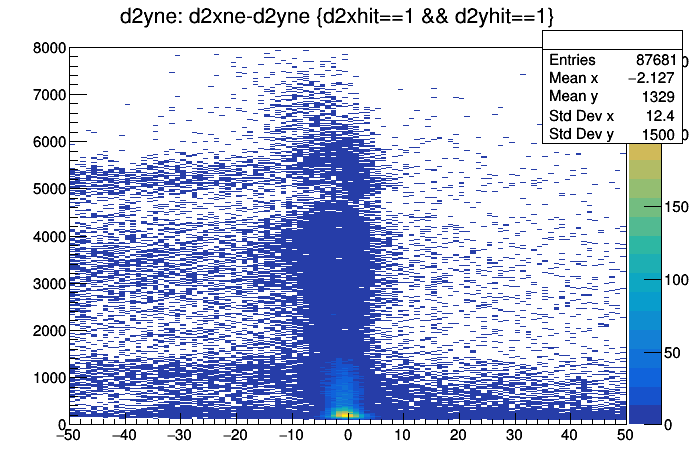

In [3]:
tree->Draw("d2yne: d2xne-d2yne>>(100,-50,50,1000,0,8000)","d2xhit==1 && d2yhit==1","colz");
c1->Draw();//d2xne-d2yne的能量差在(-15,15)范围内时，可认为有front-back correlation

## 用Scan观察DSSD hit事件结构

### a.单个DSSD

#### 1. d1yiht=2的事件

In [4]:
tree->Scan("d1xs:d1xne:d1ys:d1yne","d1yhit==2","",15);

***********************************************************************
*    Row   * Instance *      d1xs *     d1xne *      d1ys *     d1yne *
***********************************************************************
*        2 *        0 *        23 * 3110.3117 *        11 * 3322.9076 *
*        2 *        1 *        24 * 333.95804 *        10 * 114.01459 *
*        3 *        0 *        23 * 5401.4010 *        15 * 4512.7239 *
*        3 *        1 *           *           *        16 * 899.36799 *
*        4 *        0 *        21 * 5923.4416 *        15 * 5673.8636 *
*        4 *        1 *           *           *        14 * 267.53000 *
*        8 *        0 *        22 * 4079.7633 *         9 * 3766.7968 *
*        8 *        1 *           *           *        10 * 331.03513 *
*        9 *        0 *        13 * 6922.1099 *        12 * 6565.9612 *
*        9 *        1 *        10 * 139.53649 *        13 * 419.80013 *
*        9 *        2 *        14 * 103.07464 *           *     

Row 2: x面两条相邻，y面两条相邻，x,y相邻两条能量相加满足正背面关联关系(3110+333, 3322+114), 
可视为 粒子入射到(23,11)条能量为3443(取x方向)，一重事件。

Row 2,3,4,8,9,10,11,12,14: x面或一面各有相邻条，皆为一重事件。

<font color=Red>Row 9: （6922+103)-(6565+419)=41, 这个事件正背面关联超出范围，但应归为相邻条事件。主要原因是当某一条沉积能量很大时，可能有两条以上的相邻条有信号，而能量沉积较低的条的信号可能被获取的pedestal cut排除掉。对于此类事件应放宽正背面能量差的限制条件。</font>

#### 2. d1xhit>1 && d1yiht>1的事件 

In [21]:
tree->Scan("d1xs:d1xne:d1ys:d1yne","d1xhit>1 && d1yhit>1","",10,40);

***********************************************************************
*    Row   * Instance *      d1xs *     d1xne *      d1ys *     d1yne *
***********************************************************************
*       41 *        0 *         3 * 1173.7172 *        18 * 1172.5295 *
*       41 *        1 *        11 * 395.54728 *        13 * 429.67258 *
*       43 *        0 *        11 * 3209.2095 *        17 * 3838.4641 *
*       43 *        1 *        12 * 659.87695 *        14 * 500.69543 *
*       43 *        2 *         8 * 497.87608 *           *           *
*       47 *        0 *        19 * 3518.8796 *        13 * 3444.0103 *
*       47 *        1 *        18 * 1048.3486 *        14 * 1032.2400 *
*       48 *        0 *        26 *  1333.841 *        23 * 1333.7234 *
*       48 *        1 *        29 * 438.87881 *        21 * 441.31737 *
***********************************************************************
==> 9 selected entries


Row 41,43,48: 真两重事件

In [5]:
tree->Scan("d1xs:d1xne:d1ys:d1yne","d1yhit==2&& d1yne[0]>4000","",15);//观察大能量沉积时的相邻信号

***********************************************************************
*    Row   * Instance *      d1xs *     d1xne *      d1ys *     d1yne *
***********************************************************************
*        3 *        0 *        23 * 5401.4010 *        15 * 4512.7239 *
*        3 *        1 *           *           *        16 * 899.36799 *
*        4 *        0 *        21 * 5923.4416 *        15 * 5673.8636 *
*        4 *        1 *           *           *        14 * 267.53000 *
*        9 *        0 *        13 * 6922.1099 *        12 * 6565.9612 *
*        9 *        1 *        10 * 139.53649 *        13 * 419.80013 *
*        9 *        2 *        14 * 103.07464 *           *           *
*       12 *        0 *        11 * 4345.5563 *        12 * 5304.6837 *
*       12 *        1 *        10 * 1002.2317 *        10 * 115.01009 *
***********************************************************************
==> 9 selected entries


<font color=Red>Row 4,9 与上一个Scan中的Row 9的类型相同。</font>

#### 3. d2yiht=2的事件

In [6]:
tree->Scan("d2xs:d2xne:d2ys:d2yne","d2yhit==2","",30);

***********************************************************************
*    Row   * Instance *      d2xs *     d2xne *      d2ys *     d2yne *
***********************************************************************
*        1 *        0 *        20 * 692.23013 *        21 *  693.0962 *
*        1 *        1 *         8 * 224.42518 *        28 * 222.62265 *
*        2 *        0 *        22 * 765.91432 *        12 * 896.12164 *
*        2 *        1 *        31 * 184.23649 *         8 * 182.39082 *
*        2 *        2 *        25 * 160.22889 *           *           *
*        7 *        0 *        13 * 563.67565 *        10 * 564.13259 *
*        7 *        1 *        16 * 258.26035 *         7 * 258.32820 *
*        8 *        0 *        23 * 1731.8180 *        10 * 1697.0644 *
*        8 *        1 *        22 * 301.10736 *        14 * 294.34716 *
*       12 *        0 *         9 * 1317.7696 *        18 * 1317.1071 *
*       12 *        1 *        10 * 521.06755 *        10 * 517.

Type <CR> to continue or q to quit ==> 

 Row 1: x,y方向各有两重事件，两重事件条编号不相邻，$(20,21)_{x,y}=(692,693)_{ex,ey}$, $(8,28)_{x,y}=(224,222)_{ex,ey}$ 两组正背面有很好的关联，为两重粒子入射事件
 
 <font color=Blue> ***Ghost hits*** </font>: 当有两个粒子同时入射到DSSD的$(x_1,y_1)$和$(x_2,y_2)$位置时，x方向有$x_1,x_2$条有信号，y方向的$y_1,y_2$条有信号。此时粒子的入射位置有$(x_1,y_1), (x_2,y_2)和(x_1,y_2), (x_2, y_1)$两种组合，其中$(x_1,y_2)(x_2,y_1)$的位置为假，称为ghost hit。通过应用正背面能量的关联关系，可以去除ghost hit，挑选出真实的入射位置。
 
 Row 1,7,12,16,18,19,23,24,26,29 皆为两重事件
 
 Row2,8: 只有一个事件满足正背面关联，其他条可能为噪声，或者x,y两面的时间关系不满足符合条件。

#### 4. d2yiht=3的事件

In [7]:
tree->Scan("d2xs:d2xne:d2ys:d2yne","d2yhit==3","",30);

***********************************************************************
*    Row   * Instance *      d2xs *     d2xne *      d2ys *     d2yne *
***********************************************************************
*        3 *        0 *        21 * 891.07388 *        12 * 894.08412 *
*        3 *        1 *        27 * 371.91544 *        14 * 372.40689 *
*        3 *        2 *        19 * 203.20911 *        19 * 204.18740 *
*        4 *        0 *        13 * 447.37587 *        18 *  413.0448 *
*        4 *        1 *        24 * 376.96088 *        12 * 375.52039 *
*        4 *        2 *        25 * 303.93637 *        11 * 304.04334 *
*       11 *        0 *         7 * 1142.5339 *        15 * 1139.9838 *
*       11 *        1 *        13 * 528.04128 *         9 * 526.78459 *
*       11 *        2 *        11 * 204.49115 *         7 * 204.48850 *
*       17 *        0 *        19 * 1019.2379 *        22 * 1019.8941 *
*       17 *        1 *        26 * 442.27626 *        12 * 736.

Row 3,11,20: 为三重粒子入射事件

Row 4: 两重

Row 17,27:一重

### b. 多个DSSD

#### 1. DSSD1 上为两重事件 - 物理目标要求第一个DSSD中为两重事件, 而且穿过DSSD1(否则无法做粒子鉴别)

In [22]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,41);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*       41 *        0 *         3 *         2 *         1 *      1173 *      2047 *      1134 *
*       41 *        1 *        11 *        12 *        12 *       395 *       514 *       825 *
***********************************************************************************************


In [23]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,41);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*       41 *        0 *        18 *        19 *        19 *      1172 *      1789 *      1137 *
*       41 *        1 *        13 *        13 *        12 *       429 *       514 *       825 *
*       41 *        2 *           *        18 *           *           *       275 *           *
***********************************************************************************************


Row 41:

DSSD1: 两重，$(3,18)_1$, $(11,13)_2$

DSSD2: 两重，$(2,19)_1$, $(12,13)_2$

DSSD3: 两重，$(1,19)_1$, $(12,12)_2$

三个探测器的位置具有非常好的关联(轨迹为直线），为好事件

In [28]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,43);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*       43 *        0 *        11 *        11 *         7 *      3209 *       645 *      1642 *
*       43 *        1 *        12 *         8 *           *       659 *       512 *           *
*       43 *        2 *         8 *         7 *           *       497 *       180 *           *
***********************************************************************************************


In [25]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,43);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*       43 *        0 *        17 *        15 *        15 *      3838 *       661 *      1638 *
*       43 *        1 *        14 *        19 *           *       500 *       646 *           *
***********************************************************************************************


Row 43:

DSSD1: 两重，$(11,17)_1$, $(8,14)_2$

DSSD2: 两重，$(11,15)_1$, $(8,19？)_2\Delta E_{yf-yb}=50$

DSSD3: 两重，$(7,15)_1$

三个探测器的位置关联不是很好，两个径迹似乎分别为为

$\lbrace (11,17)_1,11,15)_1 \rbrace$ 

$\lbrace (8,14)_2,（8,？)_2，(7,15)_1 \rbrace$

还需要根据每个轨迹上的事件的能量关联，是否落在望远镜的PID粒子带上，来进一步判断是否为有效事件

In [26]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,48);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*       48 *        0 *        26 *        28 *        29 *      1333 *      2084 *      2318 *
*       48 *        1 *        29 *           *           *       438 *           *           *
***********************************************************************************************


In [27]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,48);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*       48 *        0 *        23 *        25 *        26 *      1333 *      2082 *      2316 *
*       48 *        1 *        21 *           *           *       441 *           *           *
***********************************************************************************************


Row 43:

DSSD1: 两重，$(26,23)_1$, $(29,21)_2$

DSSD2: 一重，$(28,25)_1$

DSSD3: 一重，$(29,26)_1$

三个探测器的位置关联很好，但DSSD1上的第二重事件阻停在DSSD1上

#### 2. d2yiht=2的事件 

In [8]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,1);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*        1 *        0 *        17 *        20 *         5 *      4867 *       692 *       149 *
*        1 *        1 *        18 *         8 *           *       994 *       224 *           *
***********************************************************************************************


In [9]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,1);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*        1 *        0 *        18 *        21 *        26 *      5817 *       693 *       148 *
*        1 *        1 *           *        28 *           *           *       222 *           *
***********************************************************************************************


Row 1:

DSSD1: 一重，$(17,18)_1$

DSSD2: 二重，$(20,21)_1$, $(8,28)_2$

DSSD3: 一重，$(5,26)_1$

 #### 3.d2yiht=3的事件

In [10]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,3);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*        3 *        0 *        23 *        21 *        20 *      5401 *       891 *      1276 *
*        3 *        1 *           *        27 *           *           *       371 *           *
*        3 *        2 *           *        19 *           *           *       203 *           *
***********************************************************************************************


In [11]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,3);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*        3 *        0 *        15 *        12 *         8 *      4512 *       894 *      1276 *
*        3 *        1 *        16 *        14 *           *       899 *       372 *           *
*        3 *        2 *           *        19 *           *           *       204 *           *
***********************************************************************************************


Row 3: 

DSSD1，一重, $(23,15)_1$

DSSD2中为三重, $(21,12)_1$, $(27,14)_2$, $(19,19)_3$

DSSD3中为一重, $(20,8)_1$

In [12]:
tree->Scan("d1xs:d2xs:d3xs:int(d1xne):int(d2xne):int(d3xne)","","",1,11);

***********************************************************************************************
*    Row   * Instance *      d1xs *      d2xs *      d3xs * int(d1xne * int(d2xne * int(d3xne *
***********************************************************************************************
*       11 *        0 *        13 *         7 *        13 *      4343 *      1142 *       970 *
*       11 *        1 *        12 *        13 *         8 *       401 *       528 *       506 *
*       11 *        2 *           *        11 *           *           *       204 *           *
***********************************************************************************************


In [13]:
tree->Scan("d1ys:d2ys:d3ys:int(d1yne):int(d2yne):int(d3yne)","","",1,11);

***********************************************************************************************
*    Row   * Instance *      d1ys *      d2ys *      d3ys * int(d1yne * int(d2yne * int(d3yne *
***********************************************************************************************
*       11 *        0 *        10 *        15 *         8 *      3563 *      1139 *       971 *
*       11 *        1 *         9 *         9 *         3 *      1158 *       526 *       504 *
*       11 *        2 *           *         7 *           *           *       204 *           *
***********************************************************************************************


Row 11: 

DSSD1，一重, $(13,10)_1$

DSSD2，三重, $(7,15)_1$, $(13,9)_2$, $(11,7)_3$

DSSD3，两重, $(13,8)_1$, $(8,3)_2$

#### <font color=Red>在探测器中多重性发生变化，可能是由于入射粒子在探测器中的破裂成多个带电粒子</font>


## <font color=Green>总结：</font>
1.  入射粒子的直线径迹条件(直线)，可用于挑选在靶上反应(探测器中无反应)的事件
  - 如果靶上有位置定位，将径迹条件进一步扩展为：靶-DSSDs上径迹满足直线
  - 如果DSSD后面有CsI阵列，靶-DSSDs径迹与CsI的位置相匹配
2. 可确定粒子的种类
  - 如果不能鉴别粒子种类(如不在望远镜的粒子带上)，可能意味着粒子在探测器中反应(破裂成多个带电粒子碎片，破裂中子逃逸)

### <font color=Blue> 根据上述讨论，可对事件进行归类，合并满足条件的相邻条事件，进行x面和y面事件匹配，并重新组织hit结构。</font>
#### <font color=Red>不满足上述关系的相邻条事件可能为两重粒子入射到相邻条引起的，这些事件还需要进行更仔细的分析</font>